In [1]:
import pandas as pd

df = pd.read_csv('sales_data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     30 non-null     object
 1   Product  30 non-null     object
 2   Region   30 non-null     object
 3   Sales    30 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [3]:
df.columns

Index(['Date', 'Product', 'Region', 'Sales'], dtype='object')

In [ ]:
df.describe()

,Sales
count,30.000000
mean,878.666667
std,368.067960
min,300.000000
25%,642.500000
50%,885.000000
75%,1172.500000
max,1600.000000


In [5]:
df.head()

,Date,Product,Region,Sales
0,2023-01-01,Laptop,North,1200
1,2023-01-02,Mobile,South,800
2,2023-01-03,Tablet,East,600
3,2023-01-04,Headphones,West,300
4,2023-01-05,Camera,Central,1000


In [6]:
df.tail()

,Date,Product,Region,Sales
25,2023-01-26,Laptop,North,1600
26,2023-01-27,Mobile,South,920
27,2023-01-28,Tablet,East,720
28,2023-01-29,Headphones,West,380
29,2023-01-30,Camera,Central,1180


In [7]:
df.isnull().sum()

Date       0
Product    0
Region     0
Sales      0
dtype: int64

In [10]:
df['Date'].value_counts().head()

Date
2023-01-01    1
2023-01-02    1
2023-01-03    1
2023-01-04    1
2023-01-05    1
Name: count, dtype: int64

In [13]:
df['Product'].value_counts()

Product
Laptop        6
Mobile        6
Tablet        6
Headphones    6
Camera        6
Name: count, dtype: int64

In [16]:
total_sales_per_product = df.groupby('Product').size()
total_sales_per_product

Product
Camera        6
Headphones    6
Laptop        6
Mobile        6
Tablet        6
dtype: int64

In [17]:
total_sales_per_region = df.groupby('Region').size()
total_sales_per_region

Region
Central    6
East       6
North      6
South      6
West       6
dtype: int64

In [18]:
# Total sales by product
sales_by_product = df.groupby("Product")["Sales"].sum().reset_index()
print(sales_by_product)

      Product  Sales
0      Camera   6710
1  Headphones   2120
2      Laptop   8250
3      Mobile   5290
4      Tablet   3990


In [19]:
# Total sales by region
sales_by_region = df.groupby("Region")["Sales"].sum().reset_index()
print(sales_by_region)

    Region  Sales
0  Central   6710
1     East   3990
2    North   8250
3    South   5290
4     West   2120


In [20]:
# Monthly sales trend 
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
print(monthly_sales)

     Month  Sales
0  2023-01  26360


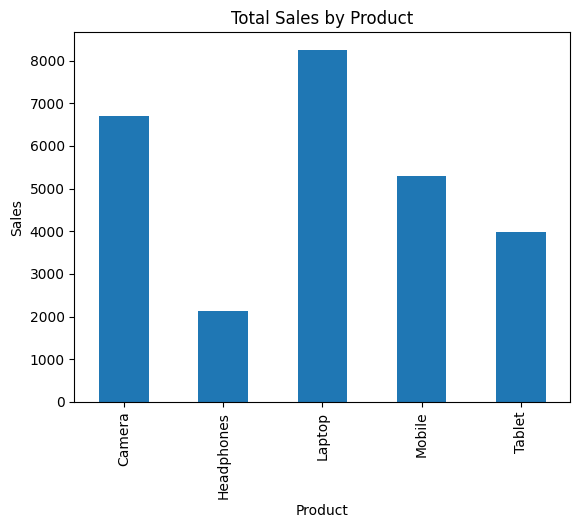

In [21]:
import matplotlib.pyplot as plt

# Sales by product
sales_by_product.plot(kind="bar", x="Product", y="Sales", legend=False)
plt.title("Total Sales by Product")
plt.ylabel("Sales")
plt.show()


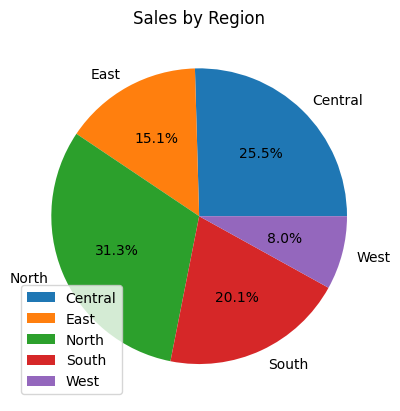

In [22]:
# Sales by region
sales_by_region.plot(kind="pie", y="Sales", labels=sales_by_region["Region"], autopct='%1.1f%%')
plt.title("Sales by Region")
plt.ylabel("")  # Hide ylabel for pie
plt.show()

c:\Users\Krishna mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


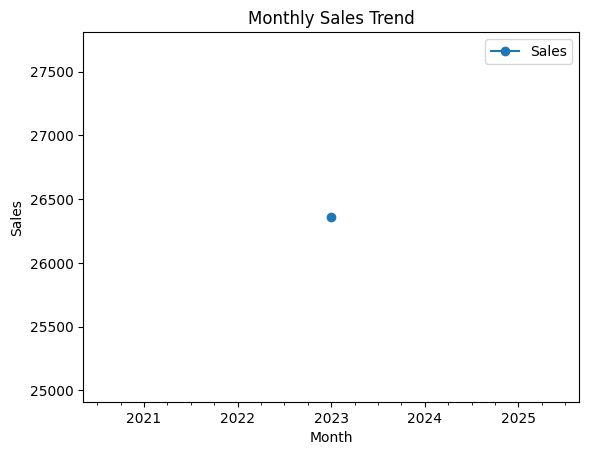

In [23]:
# Monthly trend
monthly_sales.plot(kind="line", x="Month", y="Sales", marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()